<a href="https://colab.research.google.com/github/sainisatish/Assignment_AI_Associate/blob/main/ball_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import time
import csv
import os

In [2]:

#-----------------------------------------------




ball_color = {"yellow":((20, 100, 100),(30, 255, 255)),
              "white":((0, 0, 211),(180, 30, 255)),
              "Green":((30, 50, 50),(80, 255, 255)),
              "RED":((0, 80, 150),(20, 255, 255)) }


quardent = {"first":((0,539),(0,560)),
         "second":((539,1080),(0,560)),
         "third":((539,1080),(560,1080)),
         "fourth":((0,539),(539,1080))}


#--------------------------------------------------

In [45]:
video_cap = cv2.VideoCapture("/content/drive/MyDrive/Assignment_ball_track/rcrop_video.mp4")

In [46]:
def find_loc(frame):
        bbox = []
        frame_copy = frame.copy()
        gray_img = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        gray_img = cv2.medianBlur(gray_img, 5)
        circles = cv2.HoughCircles(gray_img,cv2.HOUGH_GRADIENT,1,120,
                                       param1=100,param2=30,minRadius=45,maxRadius=70)   
        if circles is not None:
            circles = np.uint16(np.around(circles))
            for x,y,r in circles[0,:]:

                bbox.append([x,y,r])
         
            return bbox
        else:
            
            return None

In [ ]:
"""data = [] # store ball coordinates
idx = 0   # index value to use for image name purpose
img_data_path = "/content/drive/MyDrive/Assignment_ball_track/img_dataset/"
while True:

    ret,frame = video_cap.read()

    if ret:

        result = find_loc(frame)
        
        if result is not None:
            bbox = result
            
            for (bx,by,r) in bbox:
                #img_name = "img"+str(idx)+str(".jpg")
                #data.append([str(bx), str(by), str(r), img_name ])  
                #cv2.imwrite(os.path.join(img_data_path,img_name),frame)
          
        if cv2.waitKey(1)==27:
            break
        
# Break the loop

    else:
        break

file = open("dataset.csv","w")
writer = csv.writer(file)
fileds = ["x_vlaue","y_value","radius","image_name"]
writer.writerow(fileds)
for row in data:
    writer.writerow([value.strip() for value in row])
file.close()

video_cap.release()
cv2.destroyAllWindows()
"""

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Assignment_ball_track/dataset.csv")

In [4]:
dataset

x_vlaue  y_value  radius  image_name
0        620      786      66    img0.jpg
1        672      820      67    img1.jpg
2        674      818      68    img2.jpg
3        676      818      66    img3.jpg
4        674      820      68    img4.jpg
..       ...      ...     ...         ...
587      710      214      58  img587.jpg
588      720      718      67  img588.jpg
589      718      716      67  img589.jpg
590      718      718      66  img590.jpg
591      316      196      45  img591.jpg

[592 rows x 4 columns]

In [5]:
image_list = dataset["image_name"]

In [6]:
img_path = "/content/drive/MyDrive/Assignment_ball_track/data/"

In [7]:
image_list[0]

'img0.jpg'

In [8]:
img_path+image_list[0]

'/content/drive/MyDrive/Assignment_ball_track/data/img0.jpg'

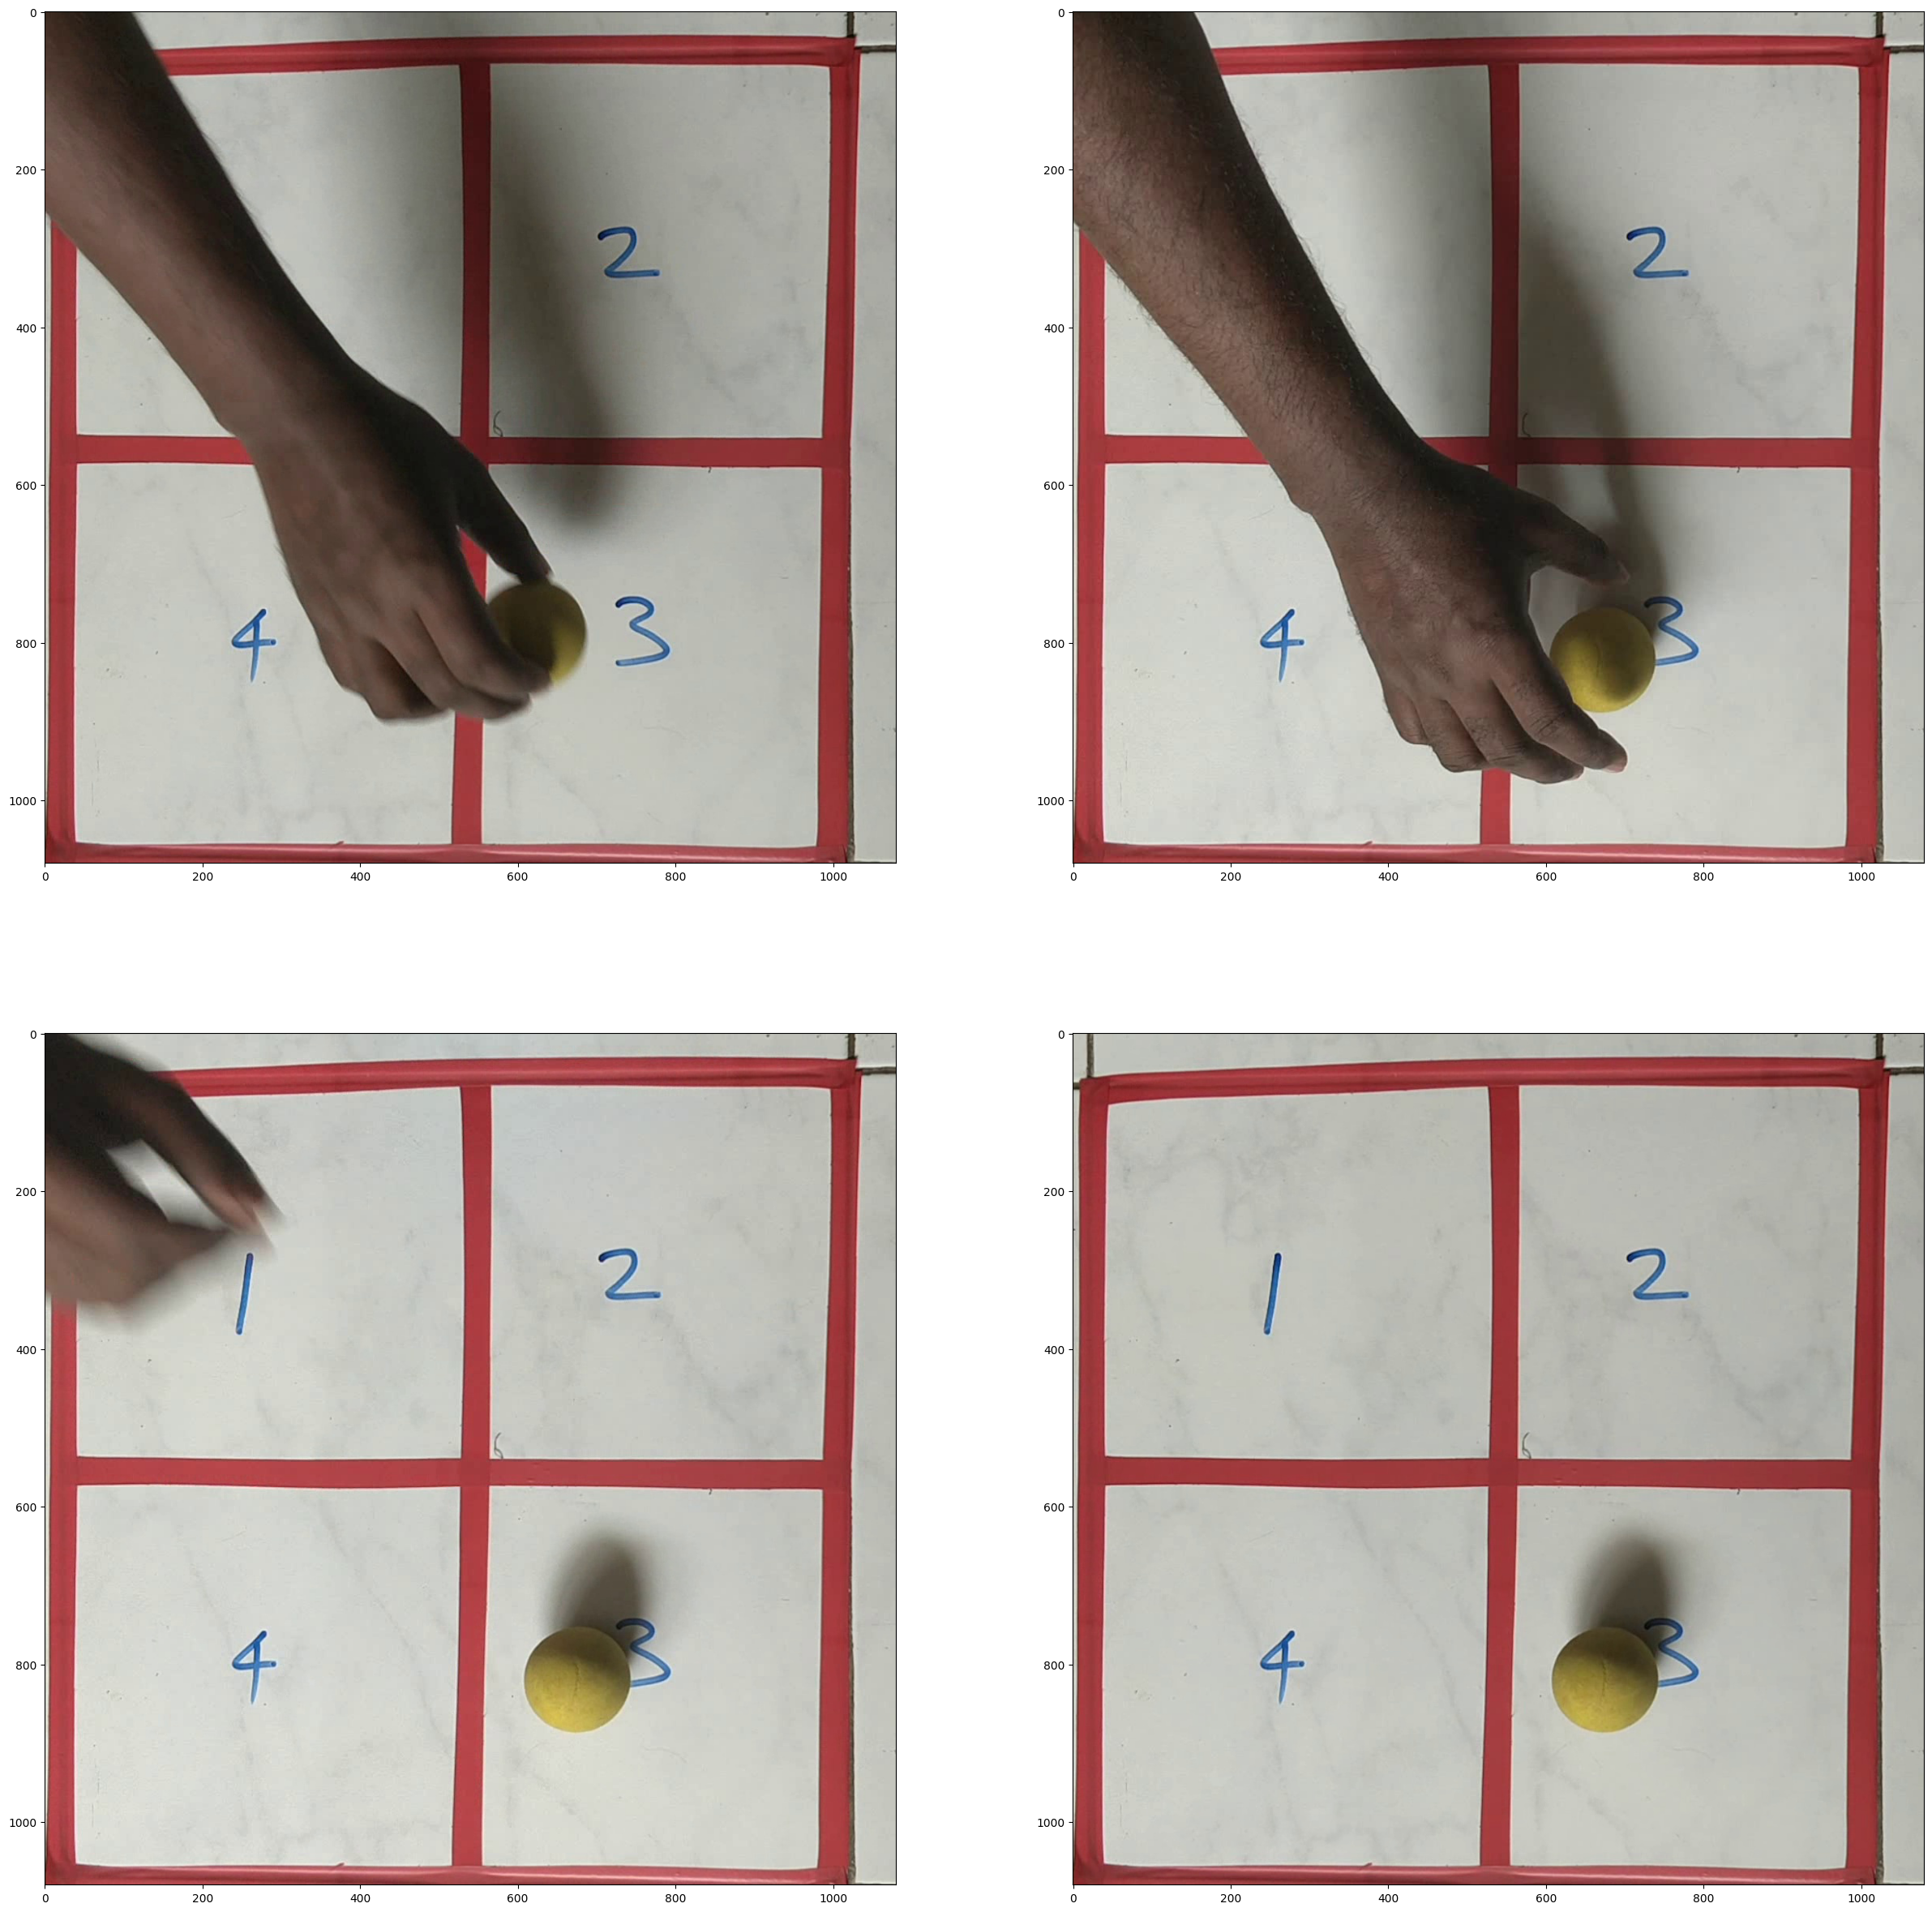

In [9]:
fig = plt.figure(figsize=(30,30))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    img_p = img_path+image_list[i]
    img = plt.imread(img_p)
    img = plt.imshow(img)


In [10]:
columns = ["x_value","y_value","radius","images"]

In [11]:
dataset.columns= columns

In [12]:
labels = dataset[columns[:3]]

In [13]:
image = dataset[columns[-1]]

In [14]:
len(image)

592

**Resize the image size to (224,224) and labels coordinates also needs to be compute**

In [15]:
from tqdm import tqdm  # to monitor progress

In [16]:
image_list = []
for i in tqdm(range(len(image))):
    path = os.path.join(img_path,image[i])
    img = cv2.imread(path,cv2.IMREAD_ANYCOLOR)
    img = cv2.resize(img,(224,224))
    img = np.array(img)
    image_list.append(img)

100%|██████████| 592/592 [08:26<00:00,  1.17it/s]


In [17]:
print(f"num of images : {len(image_list)}")

num of images : 592


In [18]:
labels = labels.apply(lambda x:x*0.2074074074) # resize coordinate value as per image size

In [19]:
labels

x_value     y_value     radius
0    128.592593  163.022222  13.688889
1    139.377778  170.074074  13.896296
2    139.792593  169.659259  14.103704
3    140.207407  169.659259  13.688889
4    139.792593  170.074074  14.103704
..          ...         ...        ...
587  147.259259   44.385185  12.029630
588  149.333333  148.918519  13.896296
589  148.918519  148.503704  13.896296
590  148.918519  148.918519  13.688889
591   65.540741   40.651852   9.333333

[592 rows x 3 columns]

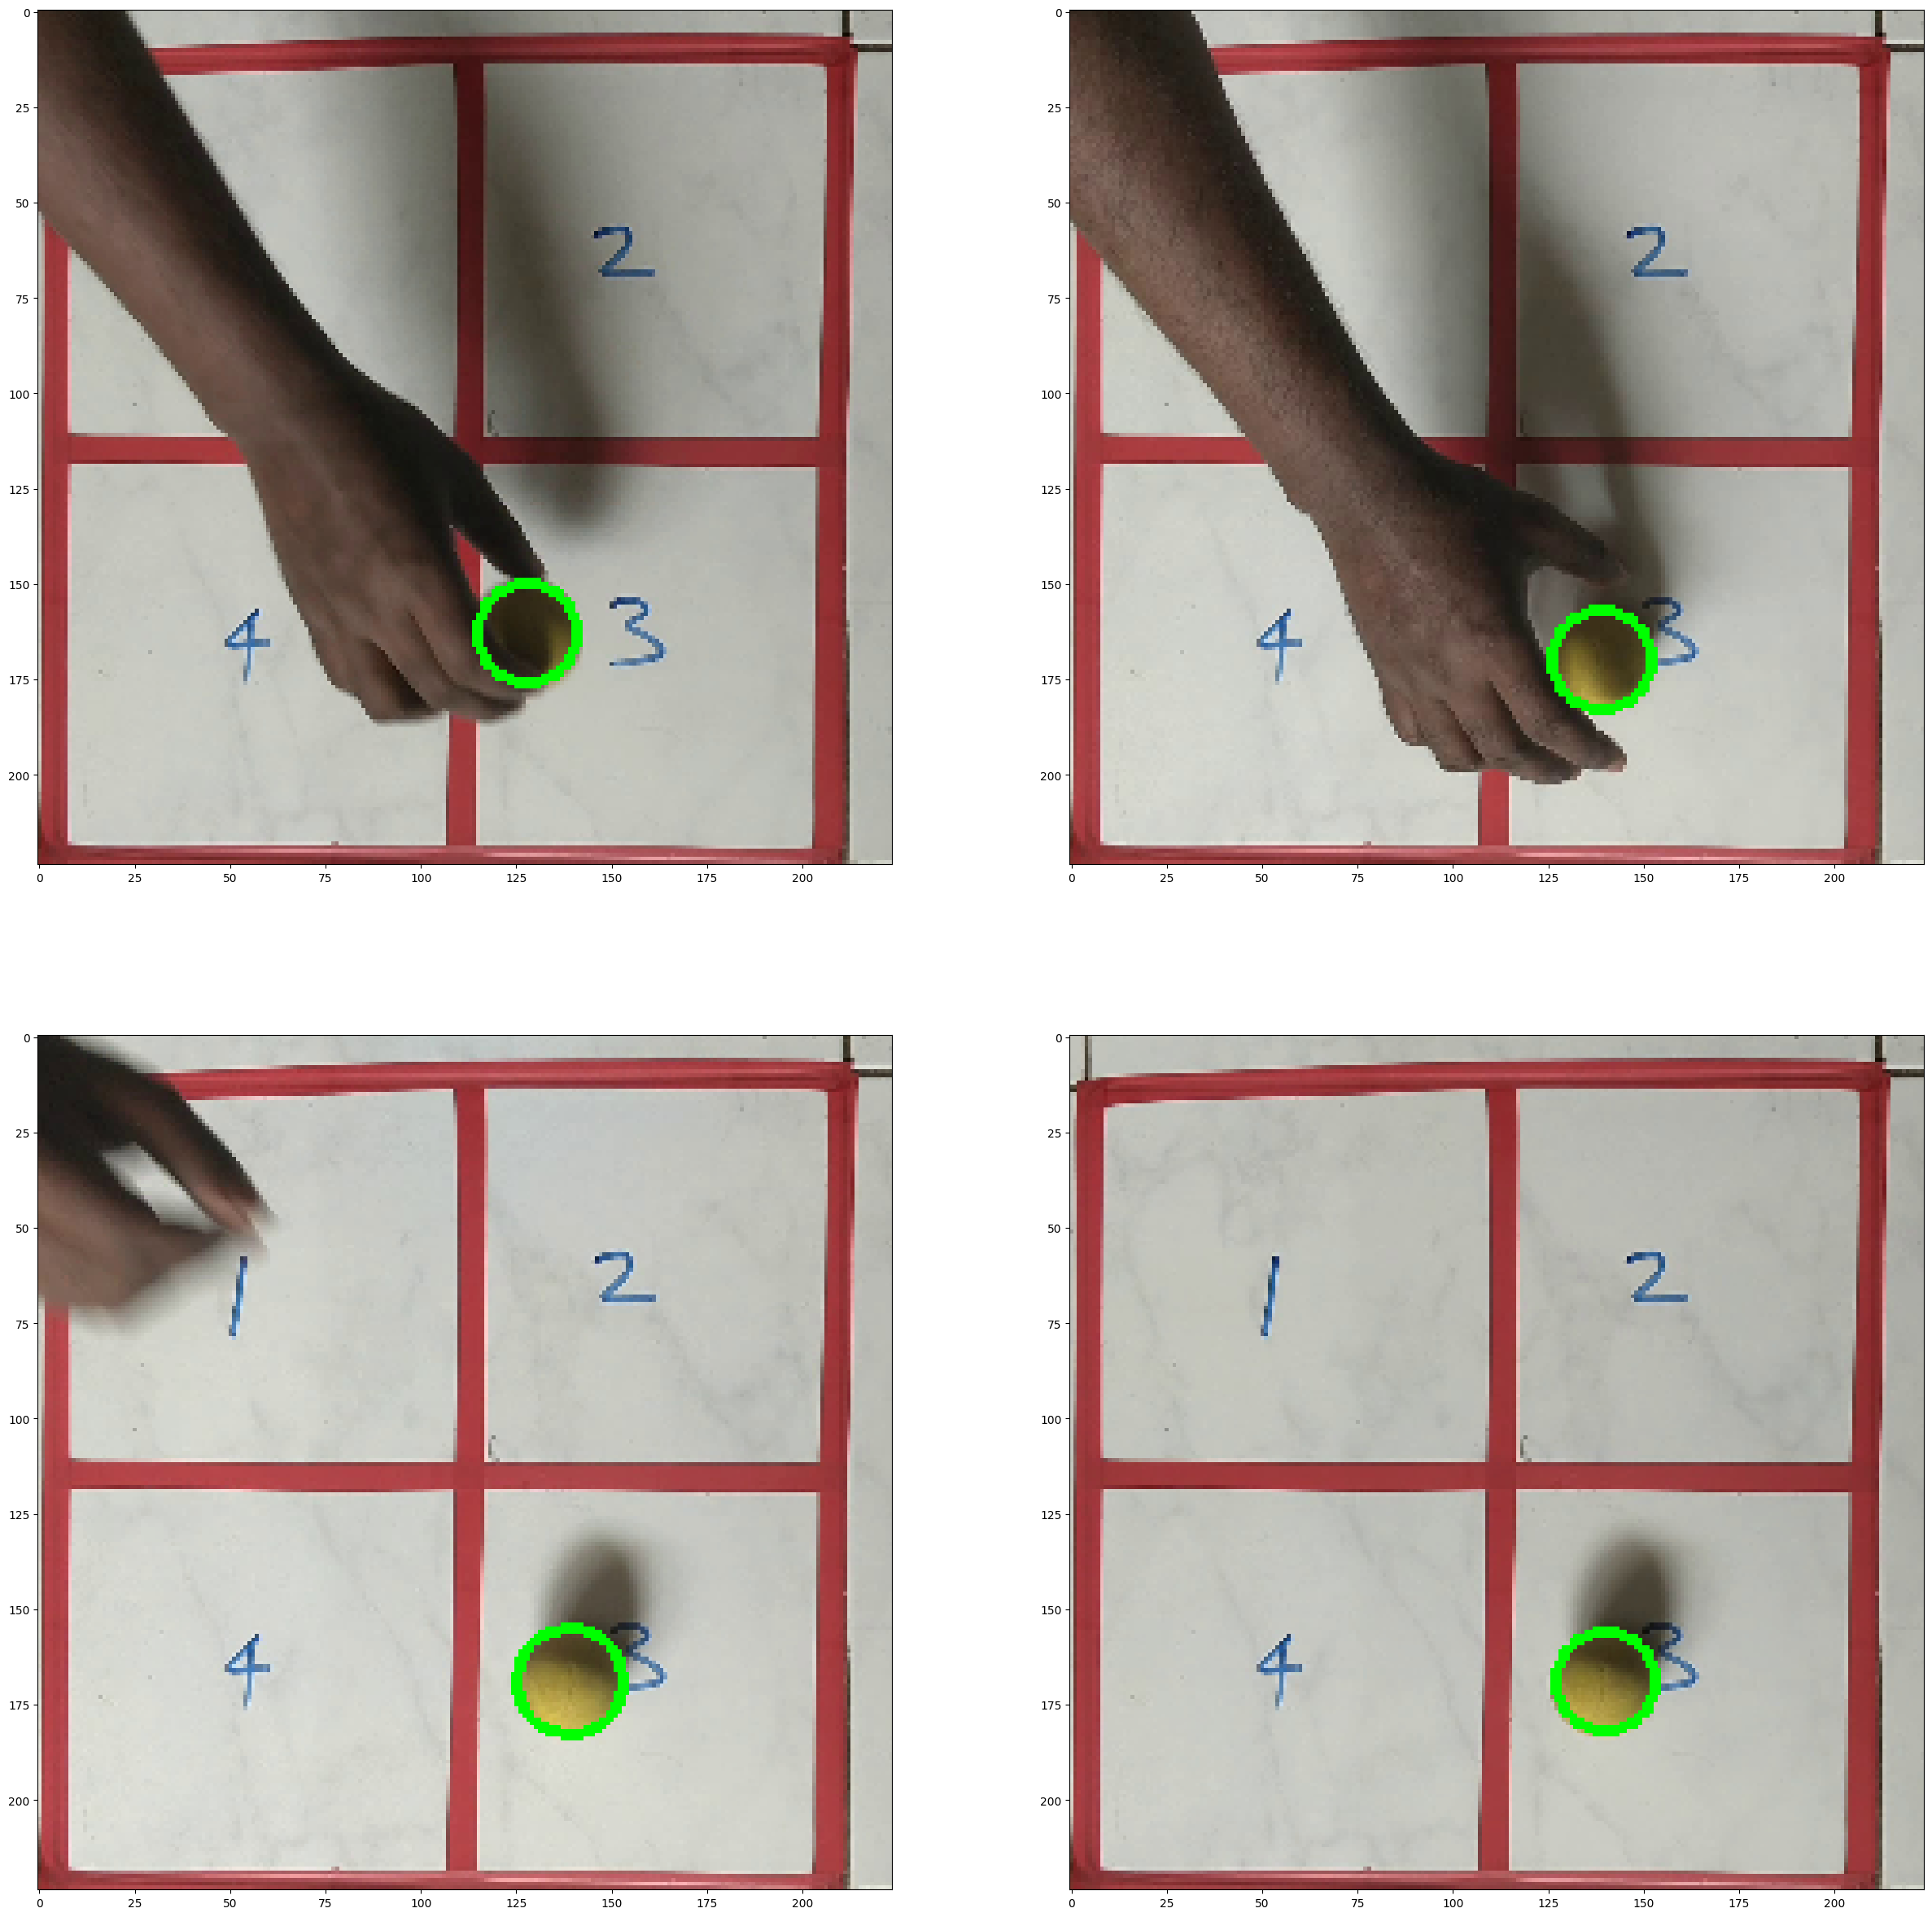

In [20]:
fig = plt.figure(figsize=(30,30))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    copy_img = image_list[i].copy()
    copy_img = cv2.cvtColor(copy_img,cv2.COLOR_BGR2RGB)
    cv2.circle(copy_img,(int(labels["x_value"][i]),int(labels["y_value"][i])),int(labels["radius"][i]),(0,255,0),2)
    img = plt.imshow(copy_img)

**Perform Data Augmentation**

# Filip Image vertically

In [21]:
image_list_copy = image_list.copy() # take a backup copy
copy_vlabels = labels.copy() # take backup copy of labels

In [22]:
vertical_flip_img = []
for img in image_list_copy:
    img = np.flip(img,axis=0)  # filip image vertically
    vertical_flip_img.append(img)

In [23]:
labels["y_value"]

0      163.022222
1      170.074074
2      169.659259
3      169.659259
4      170.074074
          ...    
587     44.385185
588    148.918519
589    148.503704
590    148.918519
591     40.651852
Name: y_value, Length: 592, dtype: float64

In [24]:
copy_vlabels["y_value"] = copy_vlabels["y_value"].apply(lambda x : 224 - x)

In [25]:
copy_vlabels

x_value     y_value     radius
0    128.592593   60.977778  13.688889
1    139.377778   53.925926  13.896296
2    139.792593   54.340741  14.103704
3    140.207407   54.340741  13.688889
4    139.792593   53.925926  14.103704
..          ...         ...        ...
587  147.259259  179.614815  12.029630
588  149.333333   75.081481  13.896296
589  148.918519   75.496296  13.896296
590  148.918519   75.081481  13.688889
591   65.540741  183.348148   9.333333

[592 rows x 3 columns]

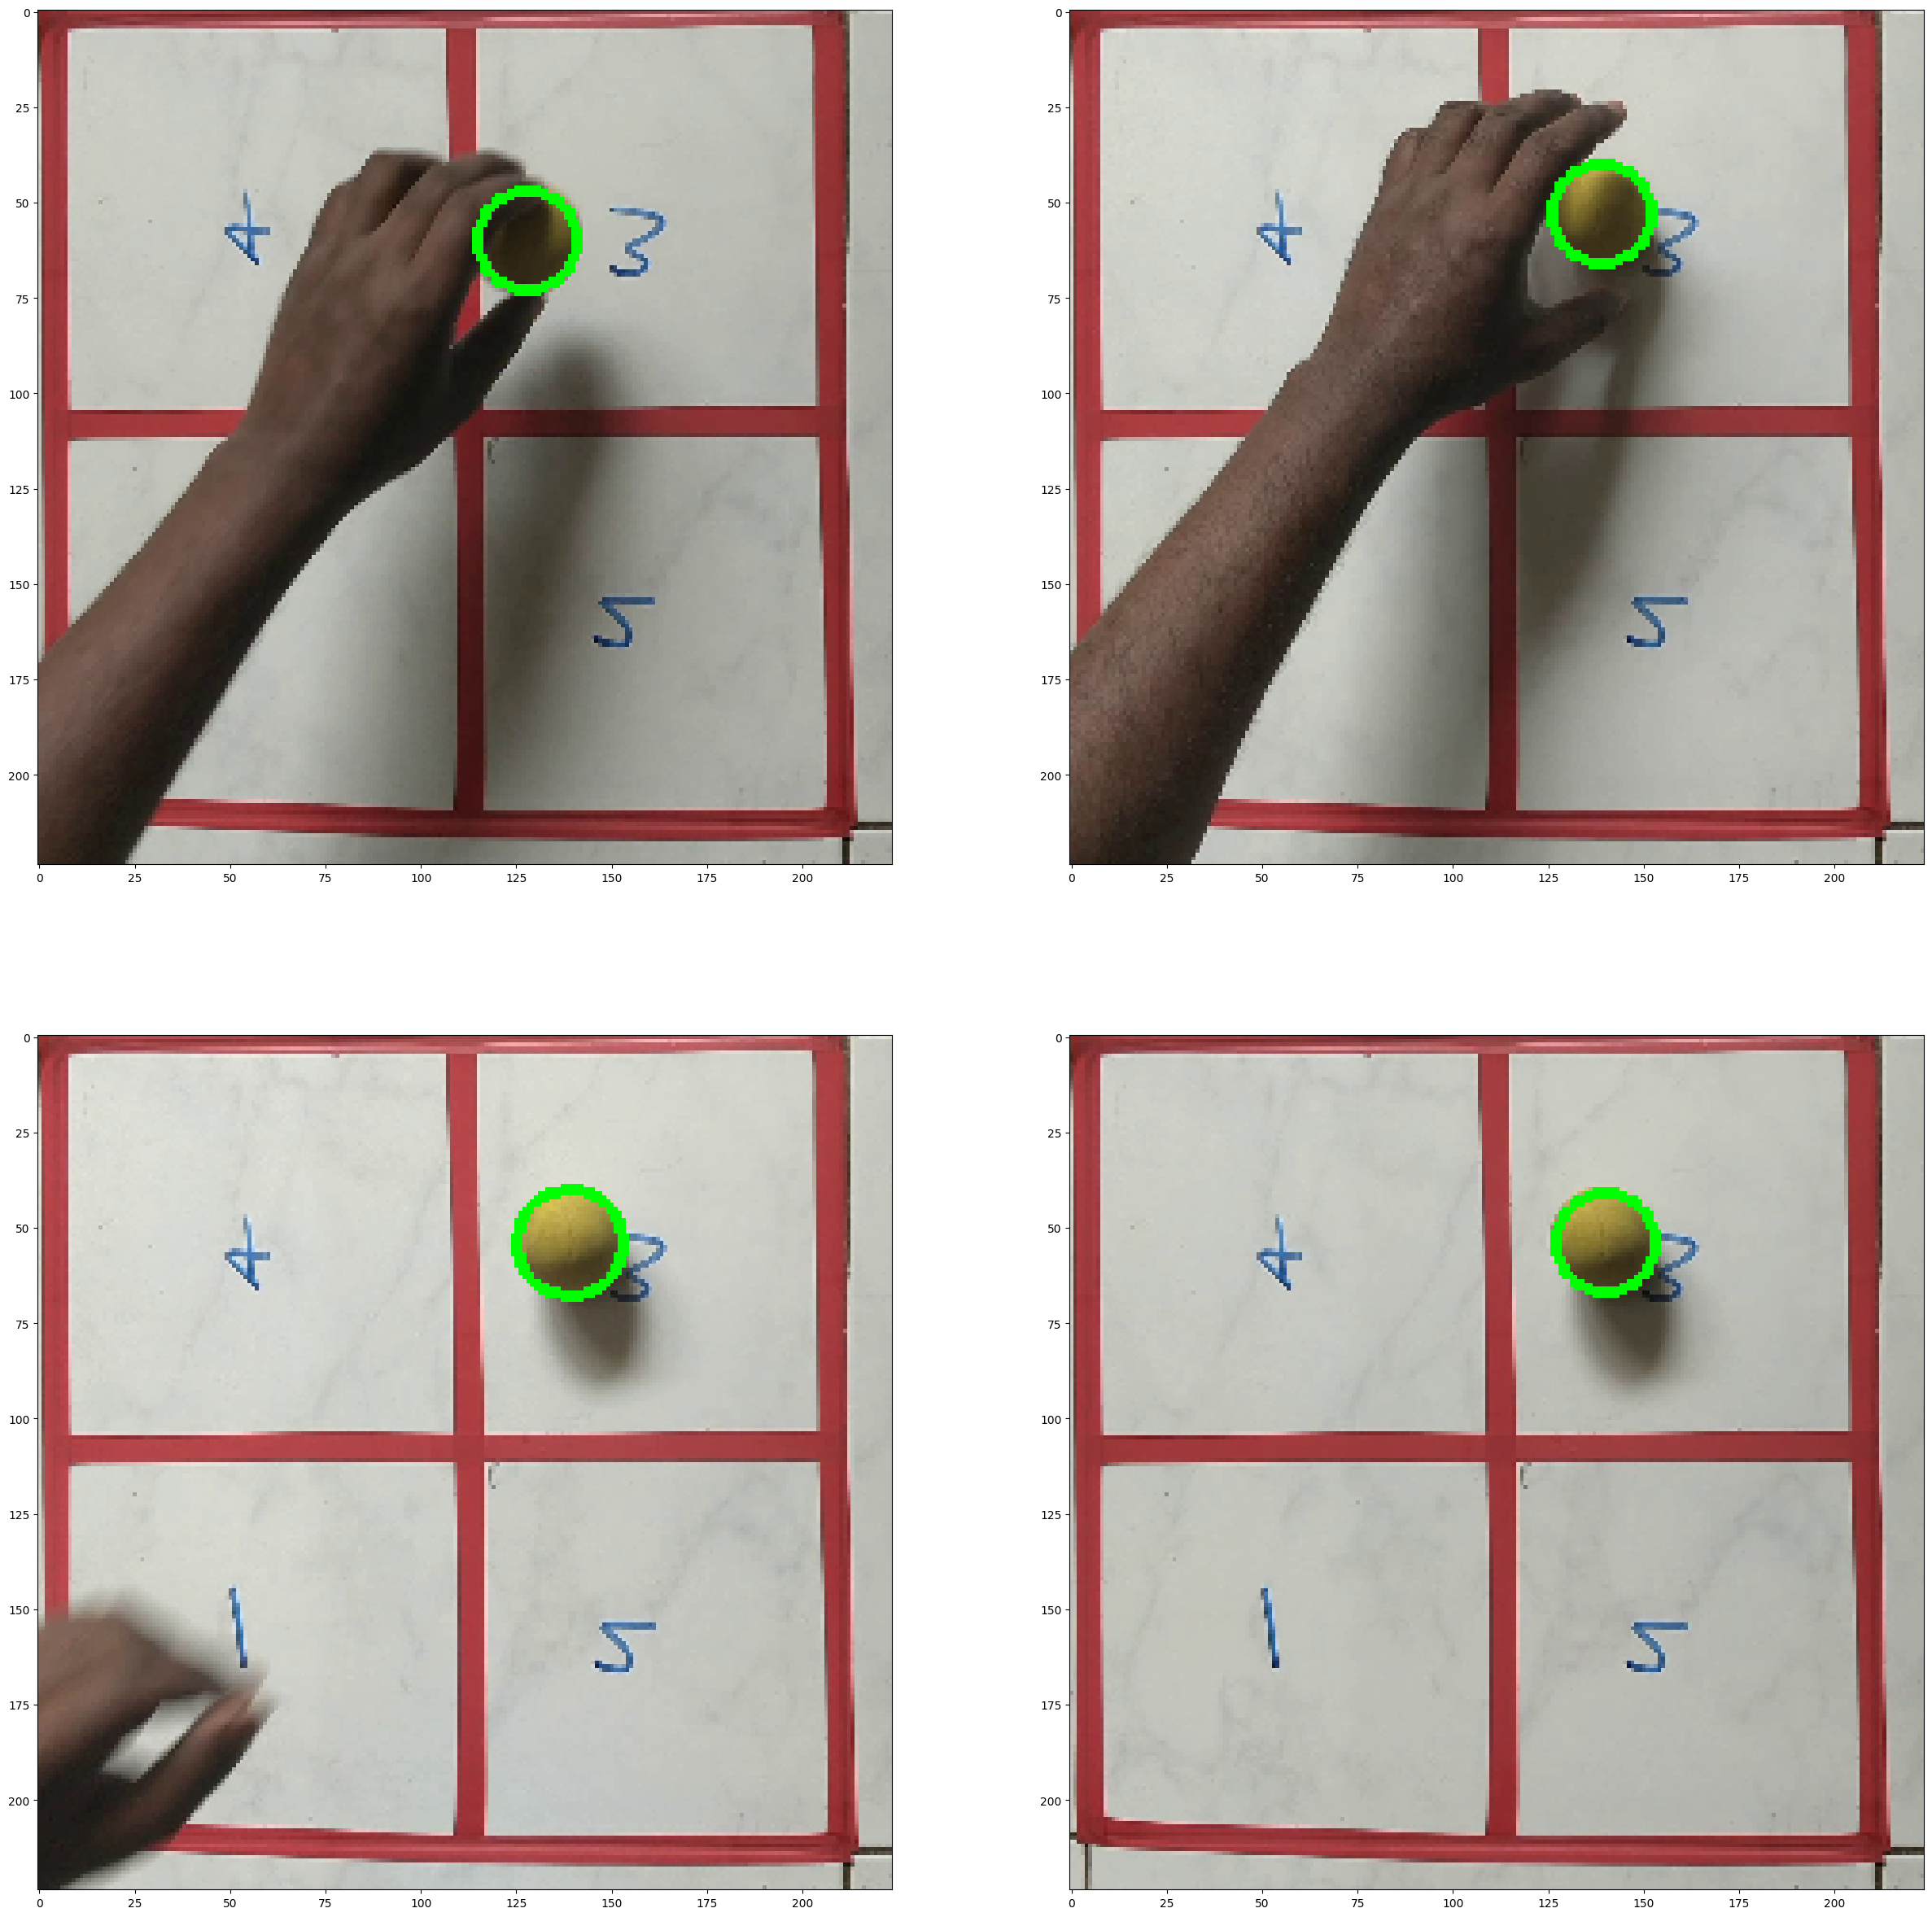

In [74]:
fig = plt.figure(figsize=(30,30))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    copy_img = vertical_flip_img[i].copy()
    copy_img = cv2.cvtColor(copy_img,cv2.COLOR_BGR2RGB)
    cv2.circle(copy_img,(int(copy_vlabels["x_value"][i]),int(copy_vlabels["y_value"][i])),int(copy_vlabels["radius"][i]),(0,255,0),2)
    img = plt.imshow(copy_img)

# Filip Image Horizontally

In [26]:
image_list_copy = image_list.copy() # take a backup copy
copy_hlabels = labels.copy() # take backup copy of labels

In [27]:
horizontal_flip_img = []
for img in image_list_copy:
    img = np.flip(img,axis=1)  # filip image Horizontally
    horizontal_flip_img.append(img)

In [28]:
labels["x_value"]

0      128.592593
1      139.377778
2      139.792593
3      140.207407
4      139.792593
          ...    
587    147.259259
588    149.333333
589    148.918519
590    148.918519
591     65.540741
Name: x_value, Length: 592, dtype: float64

In [29]:
copy_hlabels["x_value"] = copy_hlabels["x_value"].apply(lambda x : 224-x)

In [30]:
copy_hlabels["x_value"]

0       95.407407
1       84.622222
2       84.207407
3       83.792593
4       84.207407
          ...    
587     76.740741
588     74.666667
589     75.081481
590     75.081481
591    158.459259
Name: x_value, Length: 592, dtype: float64

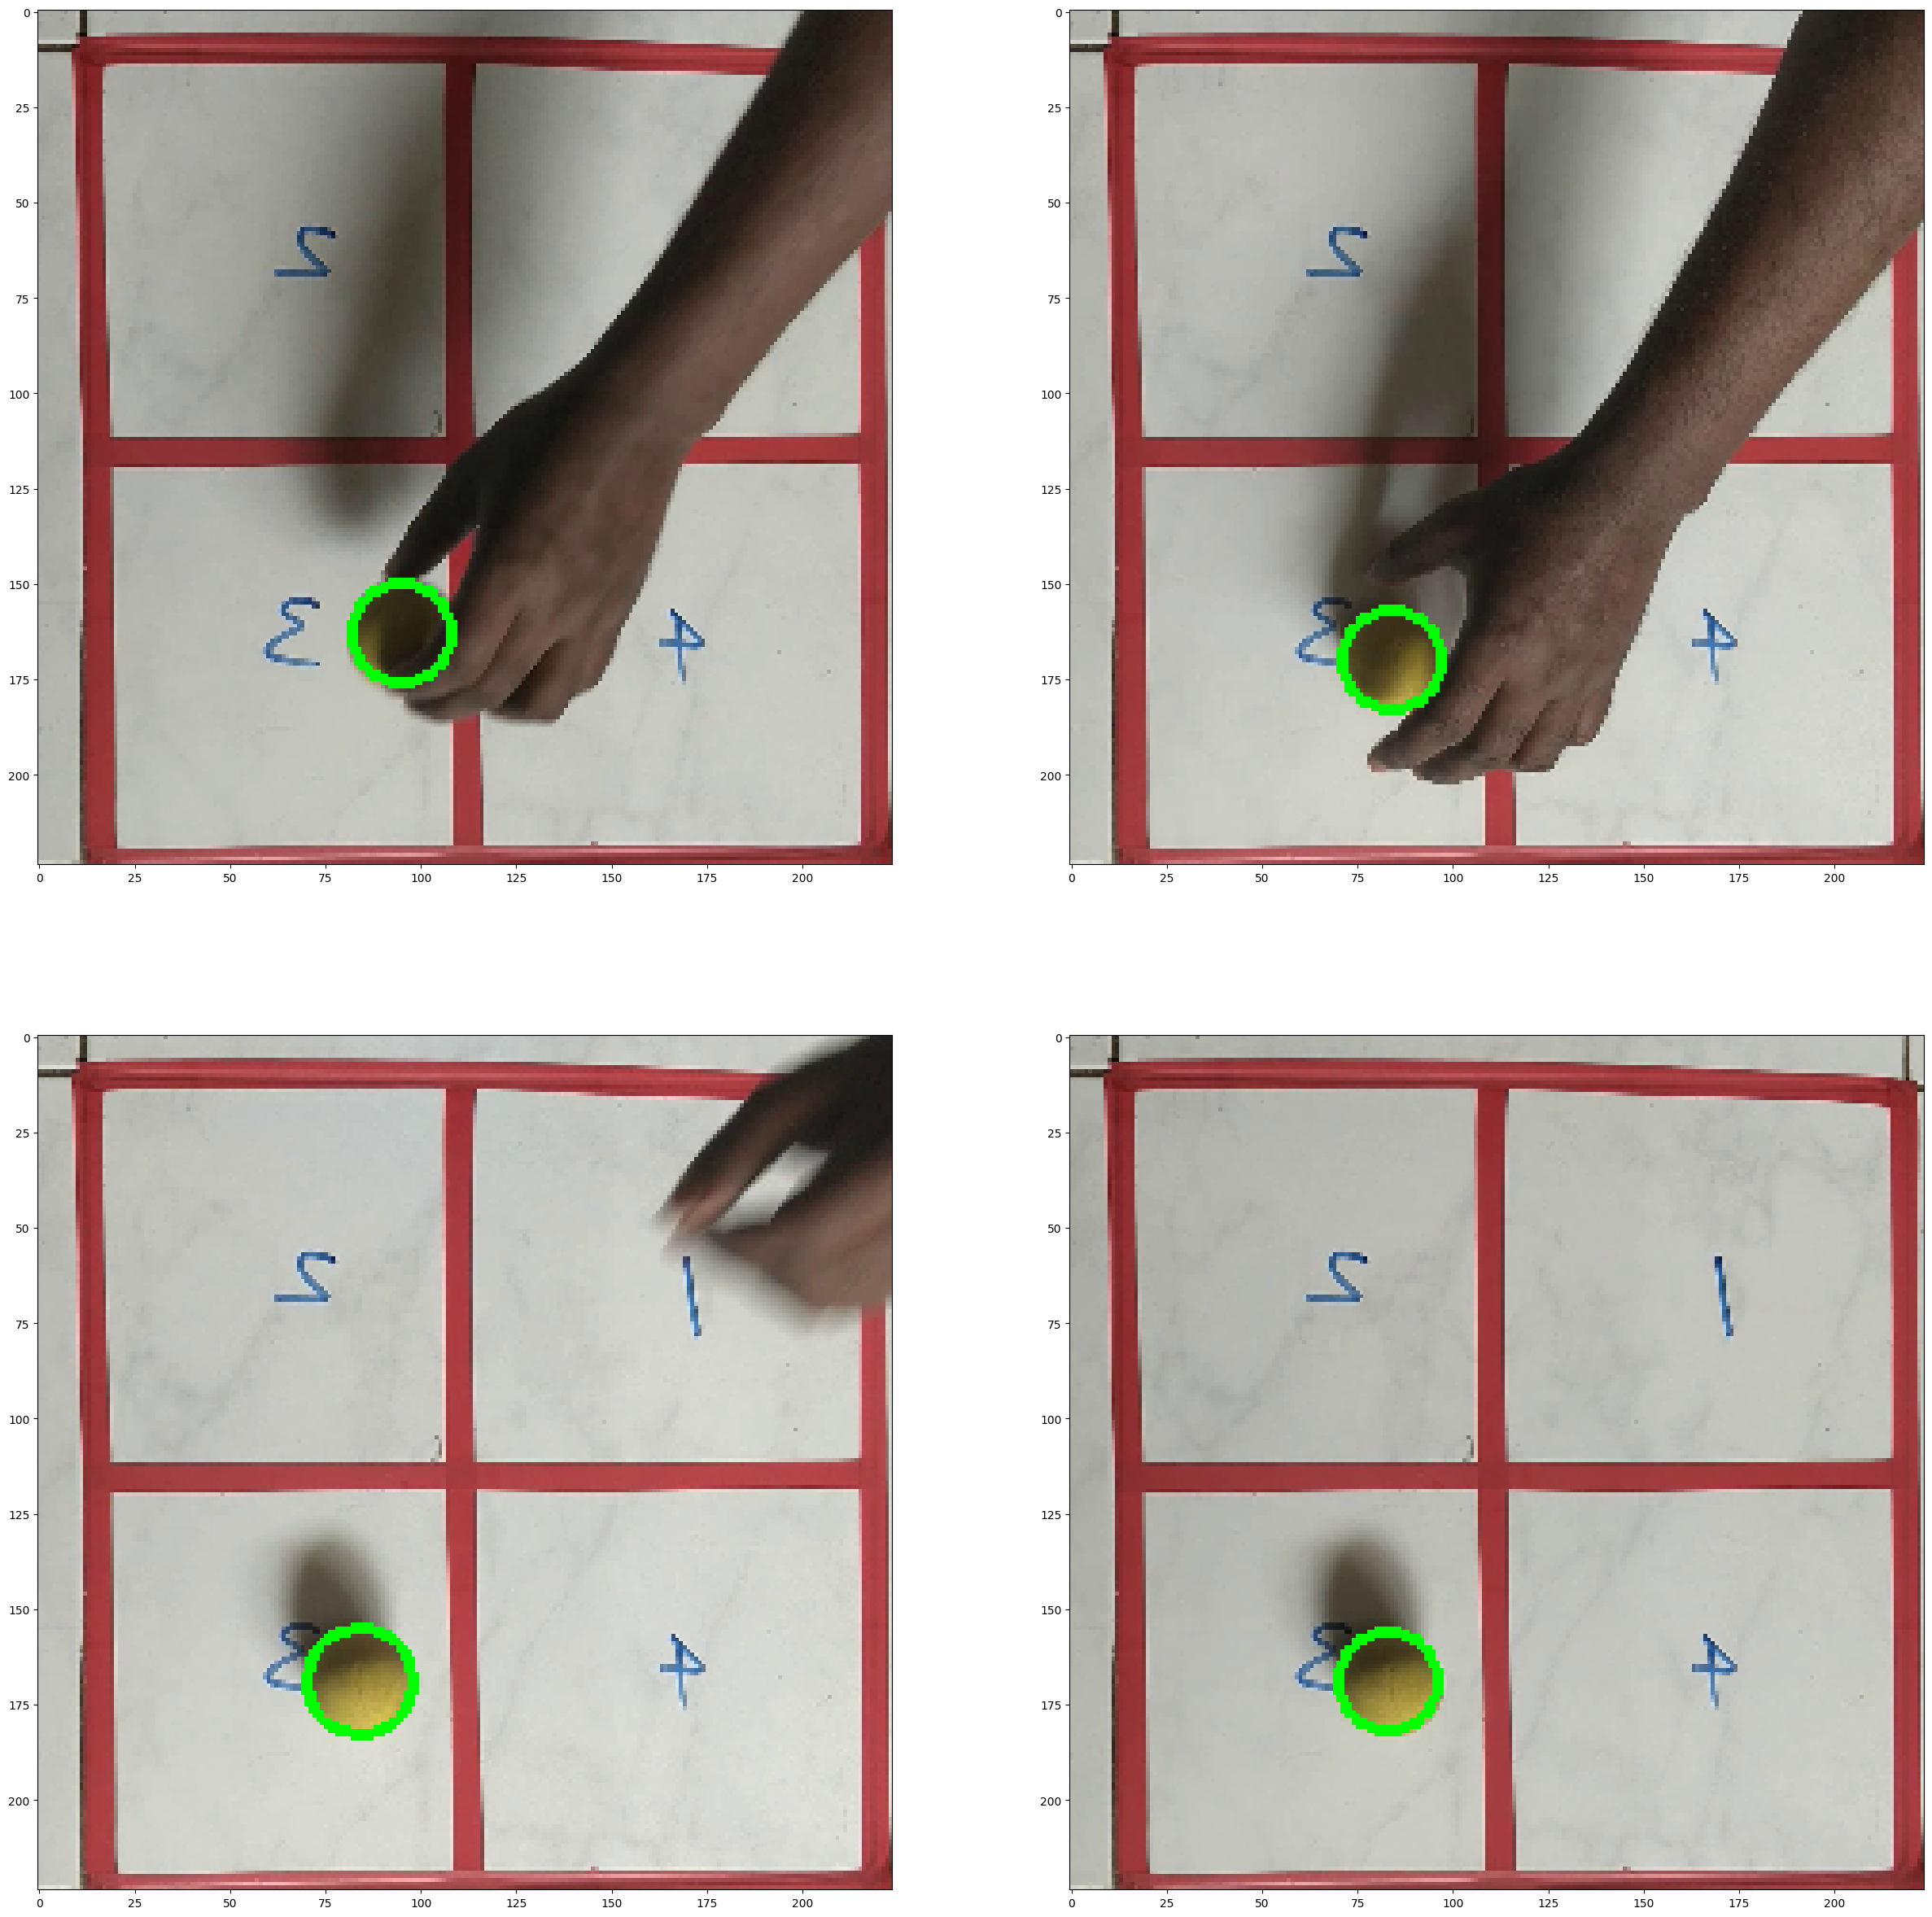

In [80]:
fig = plt.figure(figsize=(30,30))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    copy_img = horizontal_flip_img[i].copy()
    copy_img = cv2.cvtColor(copy_img,cv2.COLOR_BGR2RGB)
    cv2.circle(copy_img,(int(copy_hlabels["x_value"][i]),int(copy_hlabels["y_value"][i])),int(copy_hlabels["radius"][i]),(0,255,0),2)
    img = plt.imshow(copy_img)

# Increase Brightness

In [31]:
image_list_copy = image_list.copy()

In [32]:
import random

In [33]:
bright_img = []
for img in image_list_copy:
    img = np.clip(random.uniform(1,2)*img,0.0,255.0)  # filip image vertically
    bright_img.append(img)

In [ ]:
fig = plt.figure(figsize=(30,30))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    copy_img = bright_img[i].copy()
    copy_img = cv2.cvtColor(copy_img,cv2.COLOR_BGR2RGB)
    cv2.circle(copy_img,(int(labels["x_value"][i]),int(labels["y_value"][i])),int(labels["radius"][i]),(0,255,0),2)
    img = plt.imshow(copy_img)

In [34]:
bright_labels = labels.copy()

# Blurring image using Gaussian Blur Method

In [35]:
image_list_copy = image_list.copy()

In [36]:
blur_img = []
kernel_size = (3, 3)
sigma = 0
for img in image_list_copy:
    blurred_img = cv2.GaussianBlur(img, kernel_size, sigma)
    blur_img.append(blurred_img)

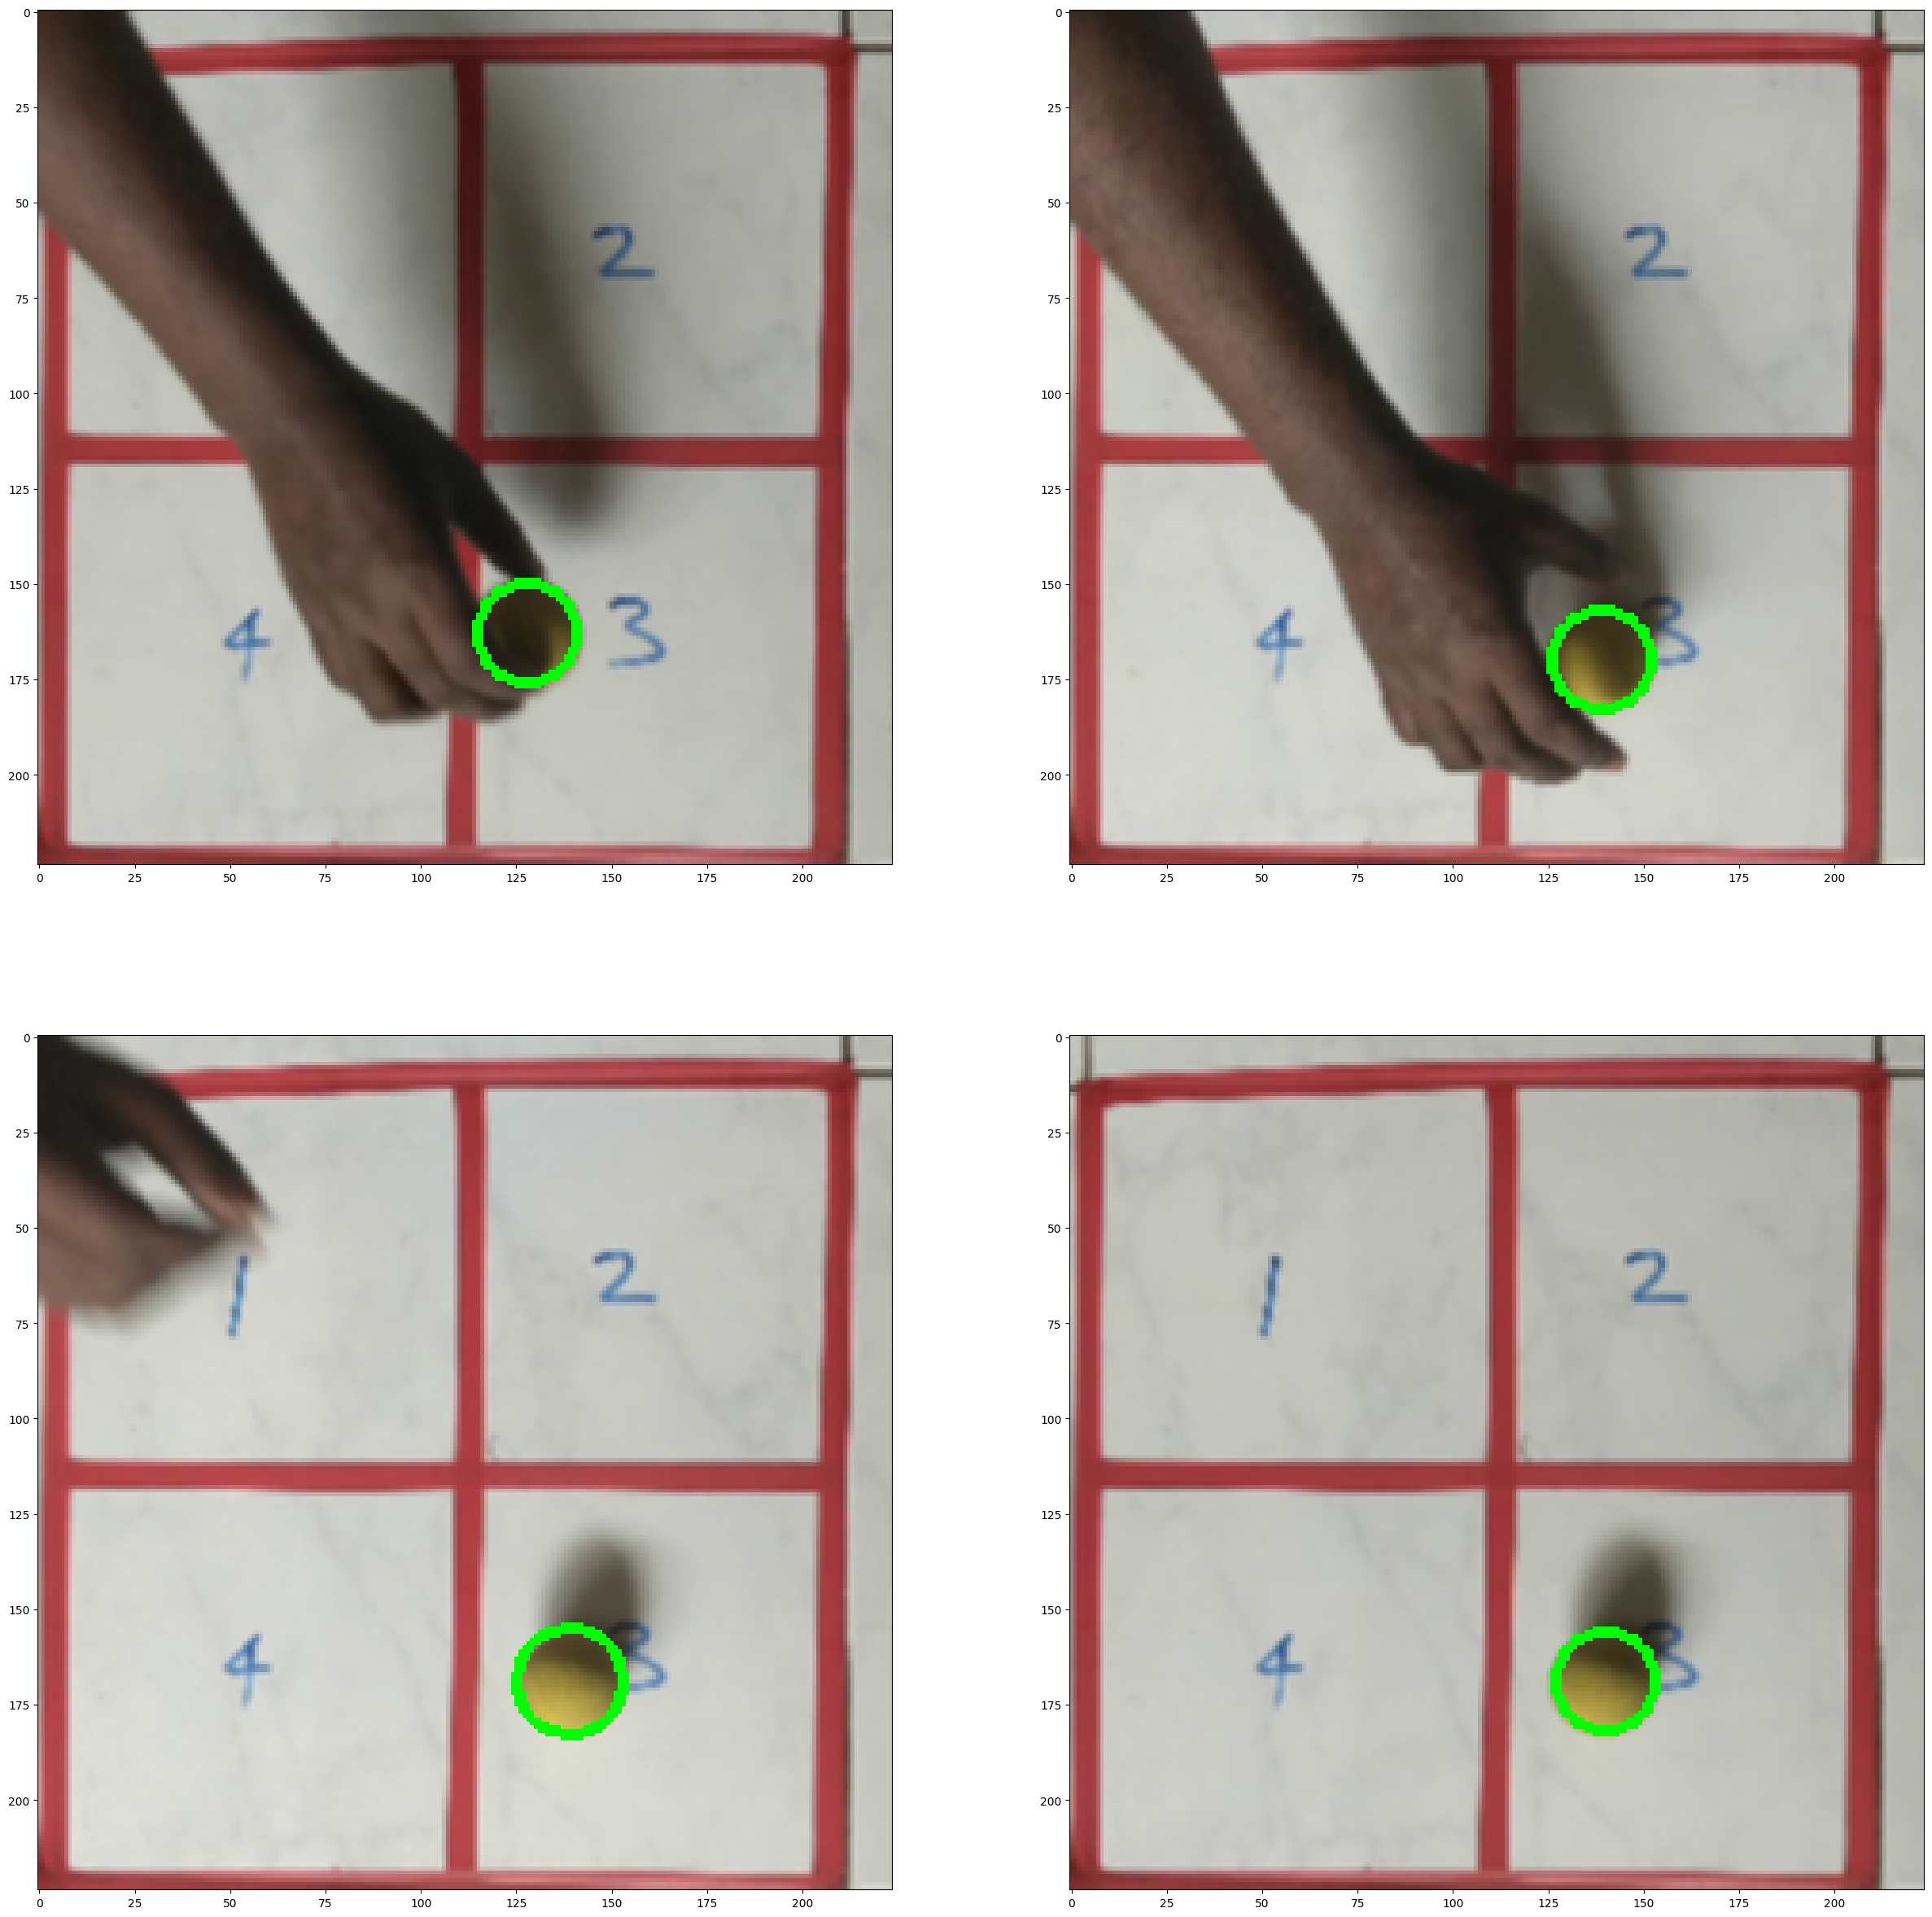

In [37]:
fig = plt.figure(figsize=(30,30))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    copy_img = blur_img[i].copy()
    copy_img = cv2.cvtColor(copy_img,cv2.COLOR_BGR2RGB)
    cv2.circle(copy_img,(int(labels["x_value"][i]),int(labels["y_value"][i])),int(labels["radius"][i]),(0,255,0),2)
    img = plt.imshow(copy_img)

In [38]:
blur_labels = labels.copy()

# Add all augmented images

In [ ]:
#vertical_flip_img  ,copy_vlabels
#horizontal_flip_img,copy_hlabels
#bright_img         ,bright_labels
#blur_img           ,blur_labels



1.   Add augmented images into orginal images
2.   Add augmented labels into orginal images



In [39]:
#Images
image_list.extend(vertical_flip_img) 

In [40]:
len(image_list)

1184

In [41]:
image_list.extend(horizontal_flip_img)

In [42]:
len(image_list)

1776

In [43]:
image_list.extend(bright_img)

In [44]:
len(image_list)

2368

In [45]:
image_list.extend(blur_img)

In [46]:
len(image_list)

2960

In [48]:
image_list[0].shape

(224, 224, 3)

In [47]:
#Labels (in dataframe form)
aug_labels = np.concatenate((labels,copy_vlabels))

In [48]:
aug_labels = np.concatenate((aug_labels,copy_hlabels))

In [49]:
aug_labels = np.concatenate((aug_labels,bright_labels))

In [50]:
aug_labels = np.concatenate((aug_labels,blur_labels))

In [51]:
aug_labels.shape

(2960, 3)

In [52]:
# now Delete unecessory created list 
del(vertical_flip_img)
del(horizontal_flip_img)
del(bright_img)
del(blur_img)

In [53]:
image_list = np.asarray(image_list)

In [56]:
image_list.shape

(2960, 224, 224, 3)

In [54]:
labels = np.asarray(aug_labels)

In [55]:
np.save("image_list.npy",image_list)

In [56]:
np.save("labels.npy",labels)

In [2]:
image_list = np.load("/content/drive/MyDrive/Assignment_ball_track/image_list.npy")

In [3]:
labels = np.load("/content/drive/MyDrive/Assignment_ball_track/labels.npy")

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,x_test,Y_train,y_test = train_test_split(image_list,labels,test_size=0.2)

In [14]:
del(X_train)
del(Y_train)

In [15]:
del(x_test)
del(y_test)

In [6]:
import tensorflow as tf

**Building Model using VGG16**

In [9]:
from tensorflow.keras import backend as K

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
vgg16_model = keras.applications.vgg16.VGG16(include_top=False,input_shape=(224,224,3))

In [9]:
vgg16_model.trainable=False

In [10]:
inputs = keras.Input(shape=(224,224,3))

x  = keras.applications.vgg16.preprocess_input(inputs)
x  = vgg16_model(x)
x  = layers.Flatten()(x)
x  = layers.Dense(256,activation='relu')(x)
x  = layers.Dropout(0.5)(x)
center_output  = layers.Dense(2,activation="linear",name="Center")(x)
radius_output  = layers.Dense(1,activation="linear",name="Radius")(x)
model = keras.Model(inputs=inputs,outputs=[center_output,radius_output])

In [72]:
tf.keras.backend.clear_session()

In [11]:
model.compile(loss={"Center":"mse","Radius":"mse"},
              optimizer="adam",
              metrics={"Center":"mae","Radius":"mae"})

In [12]:
history = model.fit(X_train,[Y_train[:,:2],Y_train[:,2]],epochs=20,validation_split=0.2)

Epoch 1/20
60/60 [==============================] - 32s 280ms/step - loss: 4602.5195 - Center_loss: 4124.0718 - Radius_loss: 478.4492 - Center_mae: 52.4848 - Radius_mae: 16.6071 - val_loss: 2388.1670 - val_Center_loss: 2349.4375 - val_Radius_loss: 38.7292 - val_Center_mae: 42.7040 - val_Radius_mae: 4.7663
Epoch 2/20
60/60 [==============================] - 10s 169ms/step - loss: 3422.9016 - Center_loss: 3261.8293 - Radius_loss: 161.0720 - Center_mae: 47.3897 - Radius_mae: 9.9246 - val_loss: 2290.7949 - val_Center_loss: 2269.6936 - val_Radius_loss: 21.1012 - val_Center_mae: 41.5865 - val_Radius_mae: 3.6642
Epoch 3/20
60/60 [==============================] - 10s 170ms/step - loss: 3037.9763 - Center_loss: 2957.4990 - Radius_loss: 80.4778 - Center_mae: 45.1440 - Radius_mae: 7.0502 - val_loss: 2558.5222 - val_Center_loss: 2540.9900 - val_Radius_loss: 17.5322 - val_Center_mae: 44.2267 - val_Radius_mae: 3.1875
Epoch 4/20
60/60 [==============================] - 10s 171ms/step - loss: 2901.81

In [13]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

In [18]:
#path of the directory where you want to save your model
frozen_out_path = '/content/drive/MyDrive/Assignment_ball_track/Untitled Folder'
# name of the .pb file
frozen_graph_filename = "frozen_graph"
model = model

In [19]:
# Convert Keras model to ConcreteFunction
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

In [20]:
# Get frozen graph def
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()

In [21]:
layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 60)
print("Frozen model layers: ")
for layer in layers:
    print(layer)
print("-" * 60)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)

------------------------------------------------------------
Frozen model layers: 
x
model/tf.__operators__.getitem/strided_slice/stack
model/tf.__operators__.getitem/strided_slice/stack_1
model/tf.__operators__.getitem/strided_slice/stack_2
model/tf.nn.bias_add/BiasAdd/bias
model/vgg16/block1_conv1/Conv2D/ReadVariableOp/resource
model/vgg16/block1_conv1/BiasAdd/ReadVariableOp/resource
model/vgg16/block1_conv2/Conv2D/ReadVariableOp/resource
model/vgg16/block1_conv2/BiasAdd/ReadVariableOp/resource
model/vgg16/block2_conv1/Conv2D/ReadVariableOp/resource
model/vgg16/block2_conv1/BiasAdd/ReadVariableOp/resource
model/vgg16/block2_conv2/Conv2D/ReadVariableOp/resource
model/vgg16/block2_conv2/BiasAdd/ReadVariableOp/resource
model/vgg16/block3_conv1/Conv2D/ReadVariableOp/resource
model/vgg16/block3_conv1/BiasAdd/ReadVariableOp/resource
model/vgg16/block3_conv2/Conv2D/ReadVariableOp/resource
model/vgg16/block3_conv2/BiasAdd/ReadVariableOp/resource
model/vgg16/block3_conv3/Conv2D/ReadVariableOp

In [22]:
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pb",
                  as_text=False)
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pbtxt",
                  as_text=True)

'/content/drive/MyDrive/Assignment_ball_track/Untitled Folder/frozen_graph.pbtxt'

I have tried to use this frozen model with opencv but got an error that stridedslice layer is not used by opencv , so our model is not compatible with opencv. 
Now i have to rebuild again or i will try to use the model with keras format.